In [1]:
#Dataset - https://www.kaggle.com/blastchar/telco-customer-churn
import pandas as pd

In [2]:
dataset = pd.read_csv('cust_churn.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
from scipy.stats import chisquare,chi2_contingency
from scipy.stats import chi2
def dependentOrIndependent(variable):
    cross=pd.crosstab(variable,dataset['Churn'])
    stat, p, dof, expected = chi2_contingency(cross)
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
        
    else:
        print('Independent (fail to reject H0)')

In [10]:
dataset.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [4]:
dataset=dataset.drop(columns=['customerID'],axis=1)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [22]:
dependentOrIndependent(dataset['gender'])
dependentOrIndependent(dataset['SeniorCitizen'])
dependentOrIndependent(dataset['Partner'])
dependentOrIndependent(dataset['PhoneService'])
dependentOrIndependent(dataset['OnlineSecurity'])
dependentOrIndependent(dataset['InternetService'])
dependentOrIndependent(dataset['OnlineSecurity'])
dependentOrIndependent(dataset['OnlineBackup'])
dependentOrIndependent(dataset['DeviceProtection'])
dependentOrIndependent(dataset['TechSupport'])
dependentOrIndependent(dataset['StreamingTV'])
dependentOrIndependent(dataset['StreamingMovies'])
dependentOrIndependent(dataset['Contract'])
dependentOrIndependent(dataset['PaperlessBilling'])
dependentOrIndependent(dataset['PaymentMethod'])

Independent (fail to reject H0)
Dependent (reject H0)
Dependent (reject H0)
Independent (fail to reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)


In [23]:
#gender and PhoneService can be dropped according to this analysis

In [5]:
dataset=dataset.drop(columns=['gender','PhoneService'],axis=1)

In [26]:
dataset.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService
PaperlessBilling
Churn

In [61]:
new_dataset=dataset.copy()
new_dataset['SeniorCitizen'] = pd.Categorical(new_dataset['SeniorCitizen']).codes 
new_dataset['Dependents'] = pd.Categorical(new_dataset['Dependents']).codes 
new_dataset['PaperlessBilling'] = pd.Categorical(new_dataset['PaperlessBilling']).codes 
new_dataset['Partner'] = pd.Categorical(new_dataset['Partner']).codes 
new_dataset['Churn'] = pd.Categorical(new_dataset['Churn']).codes 

new_dataset.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [62]:
one_hot = pd.get_dummies(new_dataset['MultipleLines'],prefix='MultipleLines',prefix_sep='_')
new_dataset = new_dataset.drop('MultipleLines',axis = 1)
new_dataset = new_dataset.join(one_hot)

new_dataset.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,0
1,0,0,0,34,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0,1,0,0
2,0,0,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,0,0,0,45,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,1,0
4,0,0,0,2,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0


In [63]:
one_hot = pd.get_dummies(new_dataset['InternetService'],prefix='InternetService',prefix_sep='_')
new_dataset = new_dataset.drop('InternetService',axis = 1)
new_dataset = new_dataset.join(one_hot)

one_hot = pd.get_dummies(new_dataset['OnlineSecurity'],prefix='OnlineSecurity',prefix_sep='_')
new_dataset = new_dataset.drop('OnlineSecurity',axis = 1)
new_dataset = new_dataset.join(one_hot)
                               
one_hot = pd.get_dummies(new_dataset['OnlineBackup'],prefix='OnlineBackup',prefix_sep='_')
new_dataset = new_dataset.drop('OnlineBackup',axis = 1)
new_dataset = new_dataset.join(one_hot)


one_hot = pd.get_dummies(new_dataset['TechSupport'],prefix='TechSupport',prefix_sep='_')
new_dataset = new_dataset.drop('TechSupport',axis = 1)
new_dataset = new_dataset.join(one_hot)

one_hot = pd.get_dummies(new_dataset['DeviceProtection'],prefix='DeviceProtection',prefix_sep='_')
new_dataset = new_dataset.drop('DeviceProtection',axis = 1)
new_dataset = new_dataset.join(one_hot)

one_hot = pd.get_dummies(new_dataset['StreamingTV'],prefix='StreamingTV',prefix_sep='_')
new_dataset = new_dataset.drop('StreamingTV',axis = 1)
new_dataset = new_dataset.join(one_hot)

one_hot = pd.get_dummies(new_dataset['StreamingMovies'],prefix='StreamingMovies',prefix_sep='_')
new_dataset = new_dataset.drop('StreamingMovies',axis = 1)
new_dataset = new_dataset.join(one_hot)

one_hot = pd.get_dummies(new_dataset['Contract'],prefix='Contract',prefix_sep='_')
new_dataset = new_dataset.drop('Contract',axis = 1)
new_dataset = new_dataset.join(one_hot)

one_hot = pd.get_dummies(new_dataset['PaymentMethod'],prefix='PaymentMethod',prefix_sep='_')
new_dataset = new_dataset.drop('PaymentMethod',axis = 1)
new_dataset = new_dataset.join(one_hot)

new_dataset.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,0,56.95,1889.5,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,53.85,108.15,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,42.30,1840.75,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,70.70,151.65,1,1,0,...,1,0,0,1,0,0,0,0,1,0


In [64]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
SeniorCitizen                              7043 non-null int8
Partner                                    7043 non-null int8
Dependents                                 7043 non-null int8
tenure                                     7043 non-null int64
PaperlessBilling                           7043 non-null int8
MonthlyCharges                             7043 non-null float64
TotalCharges                               7043 non-null object
Churn                                      7043 non-null int8
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null uint8
MultipleLines_Yes                          7043 non-null uint8
InternetService_DSL                        7043 non-null uint8
InternetService_Fiber optic                7043 non-null uint8
InternetService_No                         7043 non-null uint8
OnlineSecurit

In [65]:
new_dataset=new_dataset.drop(columns=['MultipleLines_No phone service','InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service','TechSupport_No internet service','DeviceProtection_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service','Contract_Month-to-month','PaymentMethod_Mailed check'],axis=1)

In [66]:
new_dataset.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,...,DeviceProtection_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,1,0,1,1,29.85,29.85,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,34,0,56.95,1889.5,0,1,0,...,1,1,0,1,0,1,0,0,0,0
2,0,0,0,2,1,53.85,108.15,1,1,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,45,0,42.30,1840.75,0,0,0,...,1,1,0,1,0,1,0,1,0,0
4,0,0,0,2,1,70.70,151.65,1,1,0,...,0,1,0,1,0,0,0,0,0,1


In [67]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int8

In [68]:
(Y==1).sum()

1869

In [69]:
(Y==0).sum()

5163

In [70]:
new_dataset.nunique()

SeniorCitizen                                 2
Partner                                       2
Dependents                                    2
tenure                                       73
PaperlessBilling                              2
MonthlyCharges                             1585
TotalCharges                               6531
Churn                                         2
MultipleLines_No                              2
MultipleLines_Yes                             2
InternetService_DSL                           2
InternetService_Fiber optic                   2
OnlineSecurity_No                             2
OnlineSecurity_Yes                            2
OnlineBackup_No                               2
OnlineBackup_Yes                              2
TechSupport_No                                2
TechSupport_Yes                               2
DeviceProtection_No                           2
DeviceProtection_Yes                          2
StreamingTV_No                          

In [71]:
import numpy as np
new_dataset['TotalCharges'] = new_dataset["TotalCharges"].replace(" ",np.nan)
new_dataset = new_dataset[new_dataset["TotalCharges"].notnull()]
new_dataset["TotalCharges"] = new_dataset["TotalCharges"].astype(float)


In [72]:
new_dataset['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

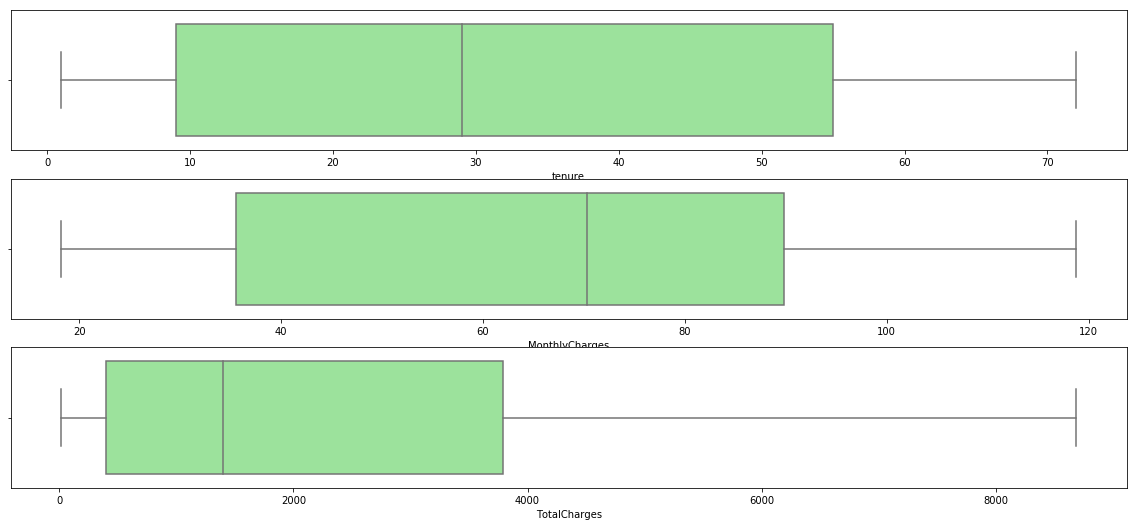

In [73]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize= (20,15))
plt.subplot(5,1,1)
sns.boxplot(x= new_dataset.tenure, color='lightgreen')

plt.subplot(5,1,2)
sns.boxplot(x= new_dataset.MonthlyCharges, color='lightgreen')

plt.subplot(5,1,3)
sns.boxplot(x= new_dataset.TotalCharges, color='lightgreen')

plt.show()

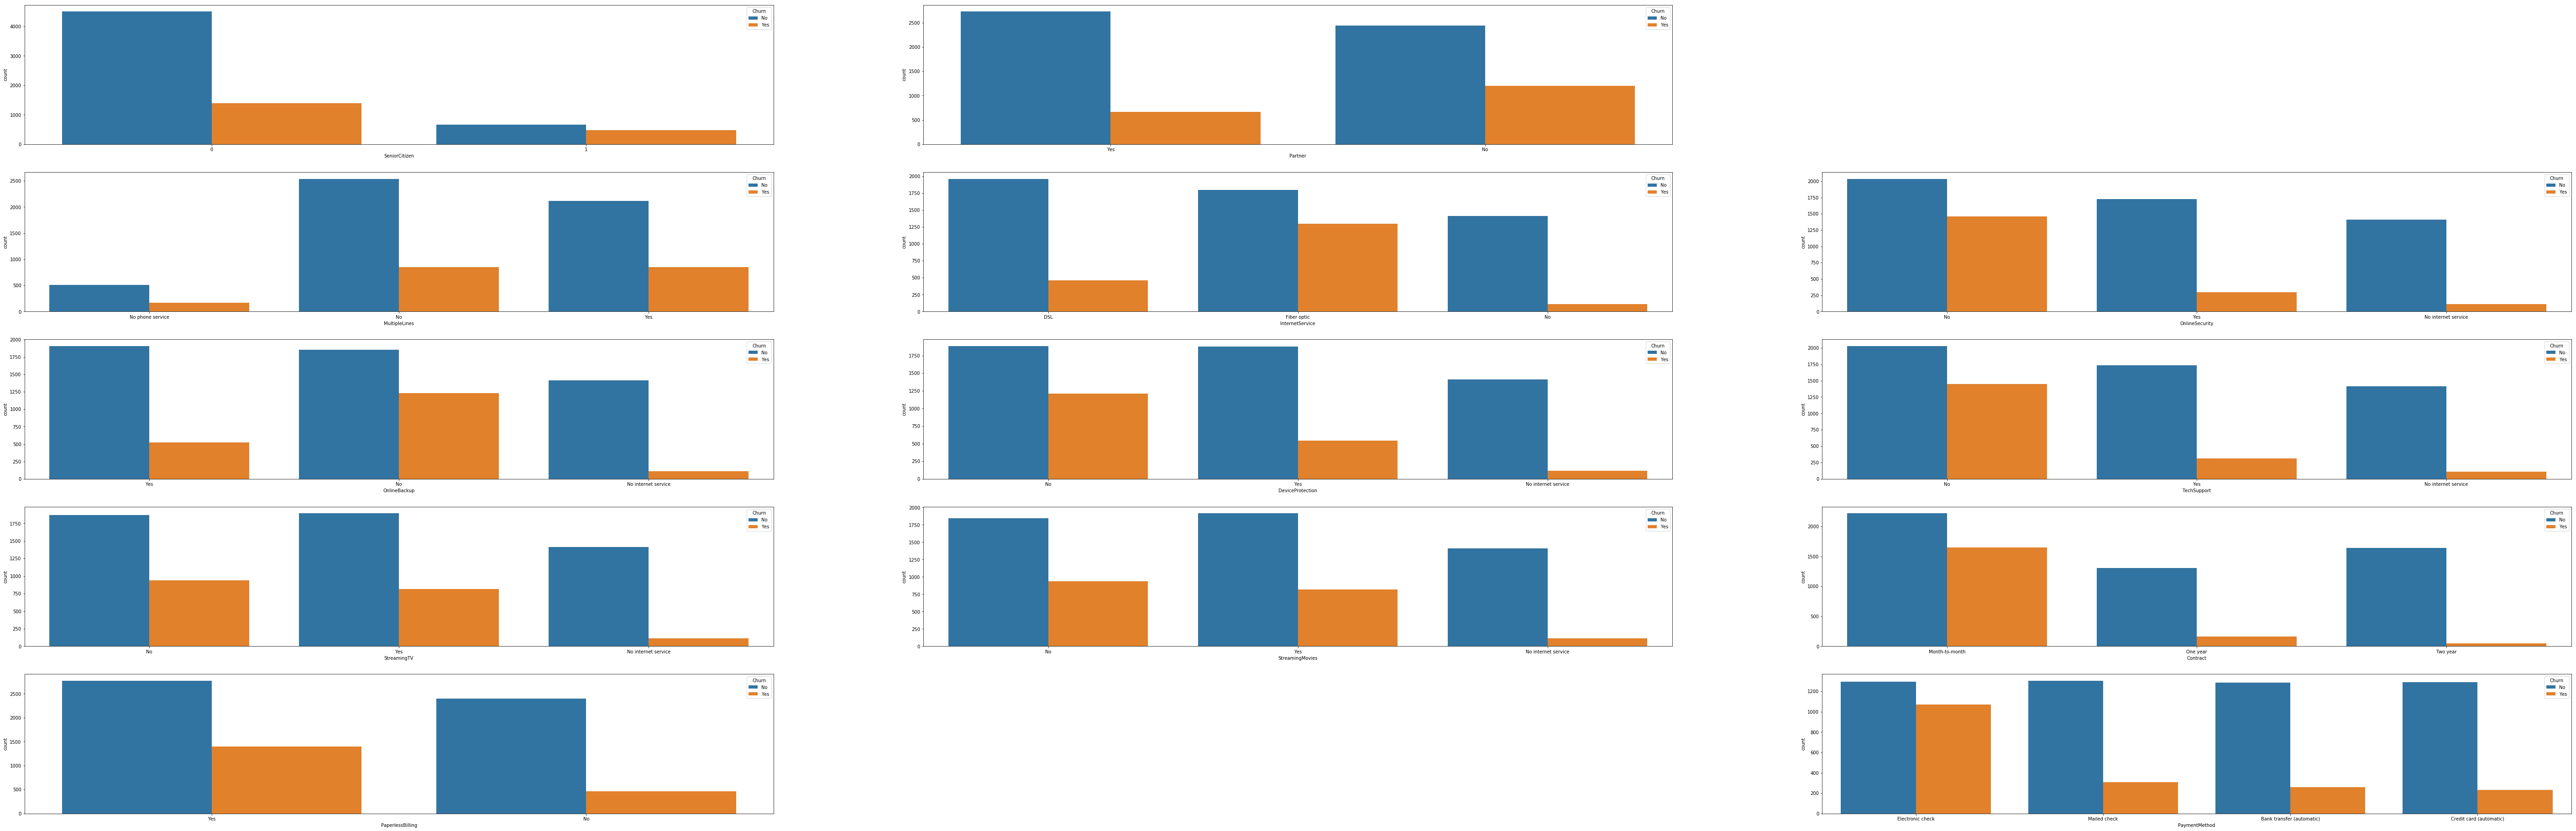

In [88]:
plt.figure(figsize= (100,100))


plt.subplot(15,3,1)
sns.countplot(dataset.SeniorCitizen,hue=dataset['Churn'])
plt.xlabel('SeniorCitizen')

plt.subplot(15,3,2)
sns.countplot(dataset.Partner,hue=dataset['Churn'])
plt.xlabel('Partner')



plt.subplot(15,3,4)
sns.countplot(dataset.MultipleLines,hue=dataset['Churn'])
plt.xlabel('MultipleLines')

plt.subplot(15,3,5)
sns.countplot(dataset.InternetService,hue=dataset['Churn'])
plt.xlabel('InternetService')

plt.subplot(15,3,6)
sns.countplot(dataset.OnlineSecurity,hue=dataset['Churn'])
plt.xlabel('OnlineSecurity')


plt.subplot(15,3,7)
sns.countplot(dataset.OnlineBackup,hue=dataset['Churn'])
plt.xlabel('OnlineBackup')

plt.subplot(15,3,8)
sns.countplot(dataset.DeviceProtection,hue=dataset['Churn'])
plt.xlabel('DeviceProtection')

plt.subplot(15,3,9)
sns.countplot(dataset.TechSupport,hue=dataset['Churn'])
plt.xlabel('TechSupport')

plt.subplot(15,3,10)
sns.countplot(dataset.StreamingTV,hue=dataset['Churn'])
plt.xlabel('StreamingTV')

plt.subplot(15,3,11)
sns.countplot(dataset.StreamingMovies,hue=dataset['Churn'])
plt.xlabel('StreamingMovies')

plt.subplot(15,3,12)
sns.countplot(dataset.Contract,hue=dataset['Churn'])
plt.xlabel('Contract')

plt.subplot(15,3,13)
sns.countplot(dataset.PaperlessBilling,hue=dataset['Churn'])
plt.xlabel('PaperlessBilling')

plt.subplot(15,3,15)
sns.countplot(dataset.PaymentMethod,hue=dataset['Churn'])
plt.xlabel('PaymentMethod')

plt.show()

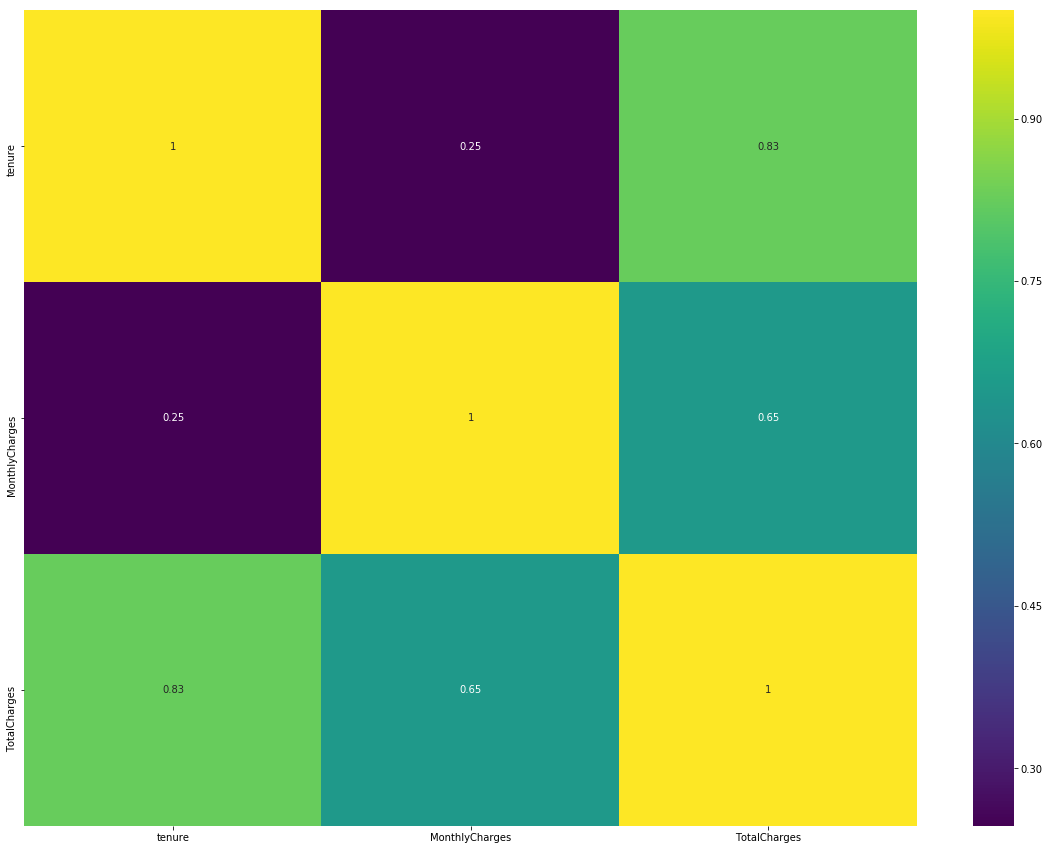

In [191]:
corr = new_dataset[['tenure','MonthlyCharges','TotalCharges']].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="viridis")

In [11]:
#so here we drop total charges
new_dataset=new_dataset.drop(columns=['TotalCharges'],axis=1)

In [193]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
SeniorCitizen                              7032 non-null int8
Partner                                    7032 non-null int8
Dependents                                 7032 non-null int8
tenure                                     7032 non-null int64
PaperlessBilling                           7032 non-null int8
MonthlyCharges                             7032 non-null float64
Churn                                      7032 non-null int8
MultipleLines_No                           7032 non-null uint8
MultipleLines_Yes                          7032 non-null uint8
InternetService_DSL                        7032 non-null uint8
InternetService_Fiber optic                7032 non-null uint8
OnlineSecurity_No                          7032 non-null uint8
OnlineSecurity_Yes                         7032 non-null uint8
OnlineBackup_No                            7032 non-null uint8
OnlineBackup_Y

In [12]:
Y=new_dataset['Churn']
X=new_dataset.drop(columns=['Churn'],axis=1)

In [195]:
(Y==1).sum()

1869

In [196]:
(Y==0).sum()

5163

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)
print(modelLR.score(X_train,y_train))
print(metrics.classification_report(modelLR.predict(X_test),y_test))
print(modelLR.score(X_test,y_test))


0.8006907761072735
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1672
           1       0.54      0.70      0.61       438

   micro avg       0.81      0.81      0.81      2110
   macro avg       0.73      0.77      0.74      2110
weighted avg       0.84      0.81      0.82      2110

0.8132701421800947


/Users/ashish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1660
           1       0.57      0.69      0.62       450

   micro avg       0.82      0.82      0.82      2110
   macro avg       0.74      0.77      0.75      2110
weighted avg       0.84      0.82      0.83      2110



In [15]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB(priors=None)
modelNB.fit(X_train, y_train)
print(modelNB.score(X_train,y_train))
print(metrics.classification_report(modelNB.predict(X_test),y_test))
print(modelNB.score(X_test,y_test))

0.7468508736286062
              precision    recall  f1-score   support

           0       0.76      0.90      0.83      1314
           1       0.76      0.55      0.64       796

   micro avg       0.76      0.76      0.76      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.76      0.76      0.75      2110

0.7639810426540284


In [19]:
from sklearn.svm import SVC
modelSVC=SVC(C=0.1, cache_size=200,  coef0=0.0,
decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, shrinking=True,
  tol=0.001)
modelSVC.fit(X_train, y_train)
print(modelSVC.score(X_train,y_train))
print(metrics.classification_report(modelSVC.predict(X_test),y_test))
print(modelSVC.score(X_test,y_test))

0.7773262901259651
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1972
           1       0.19      0.77      0.30       138

   micro avg       0.76      0.76      0.76      2110
   macro avg       0.58      0.77      0.58      2110
weighted avg       0.93      0.76      0.82      2110

0.7649289099526067


In [20]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier()

In [23]:
treeFinalWithNewXFit = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 30,
 max_leaf_nodes= 23)

In [24]:
treeFinalWithNewXFit.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=23,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
print(treeFinalWithNewXFit.score(X_train,y_train))
print(metrics.classification_report(treeFinalWithNewXFit.predict(X_test),y_test))
print(treeFinalWithNewXFit.score(X_test,y_test))

0.8019097927671678
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1718
           1       0.47      0.69      0.56       392

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.70      0.76      0.72      2110
weighted avg       0.84      0.80      0.81      2110

0.8


In [42]:
from sklearn.ensemble import AdaBoostClassifier
ada1=AdaBoostClassifier(base_estimator=treeFinalWithNewXFit,n_estimators=60,algorithm='SAMME')
ada1.fit(X_train,y_train)
print(ada1.score(X_train,y_train))
print(metrics.classification_report(ada1.predict(X_test),y_test))
print(ada1.score(X_test,y_test))

0.8384802925639984
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1700
           1       0.49      0.68      0.57       410

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.70      0.76      0.72      2110
weighted avg       0.83      0.80      0.81      2110

0.8009478672985783


In [47]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=treeFinalWithNewXFit,n_estimators=100,  bootstrap=True, oob_score=True)
bgcl = bgcl.fit(X_train, y_train)
print(bgcl.score(X_train,y_train))
print(metrics.classification_report(bgcl.predict(X_test),y_test))
print(bgcl.score(X_test,y_test))

0.8159284843559529
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1720
           1       0.48      0.70      0.57       390

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.70      0.77      0.72      2110
weighted avg       0.84      0.80      0.82      2110

0.804739336492891


In [21]:
dt_model.fit(X_train, y_train )
feat_importance = dt_model.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(X.columns, dt_model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
MonthlyCharges,0.279748
tenure,0.244597
OnlineSecurity_No,0.114363
InternetService_Fiber optic,0.041295
SeniorCitizen,0.028493
Partner,0.026930
PaymentMethod_Electronic check,0.026718
PaperlessBilling,0.026134
Dependents,0.024846
Contract_Two year,0.018330


In [58]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(min_samples_split = 40,max_depth = 5, min_samples_leaf = 10,  n_estimators = 1000,bootstrap=True, oob_score=True,
max_leaf_nodes= 40)
rfcl = rfcl.fit(X_train, y_train)
print(rfcl.score(X_train,y_train))
print(metrics.classification_report(rfcl.predict(X_test),y_test))
print(rfcl.score(X_test,y_test))

0.8061763510767981
              precision    recall  f1-score   support

           0       0.93      0.82      0.88      1748
           1       0.46      0.72      0.56       362

   micro avg       0.81      0.81      0.81      2110
   macro avg       0.70      0.77      0.72      2110
weighted avg       0.85      0.81      0.82      2110

0.8056872037914692
